In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

In [101]:
def map_entries(e):
    k, v = e.split(':')
    if k == 'arr_s':
        k = 'arr_size'
    if k == 'buckets':
        k = 'buckets_no'
    return (k, [float(v)])
def me2dict(d):
    return dict(list(map(map_entries, d.split(","))))


In [102]:
ALGOS = ['Sequentiall', 'Incorrect NAME', 'Parallel-2', 'Parallel-3']
gi = 0

In [103]:

def get_speedup(m, a):
    speedup = m.drop(columns='algo').loc[0] / m.drop(columns='algo').loc[a]
    return speedup

In [104]:
def get_data(file, algos):
    with open(file) as f:
        a = f.read().split()
        a = list(filter(lambda l: l != 'Not sorted', a))
        # print(a)
        data_d = list(map(me2dict, a))
        c = 0
        for d in data_d:
            d['algo'] = [algos[c]]
            c+=1
            c%=len(algos)
        for i in range(1, len(data_d)):
            for k in data_d[0]:
                data_d[0][k] += data_d[i][k]

    df = pd.DataFrame.from_dict(data_d[0])
    return df


In [105]:
def plot(df, i,  t='buckets_no', th=1, add_t=""):
    # plt.figure(figsize=(16,16))
    a = df.loc[df['algo'] == i]
    a.drop(columns=['algo', 'buckets_no', 'arr_size', 'total_time']).plot(kind='bar', stacked=True)
    plt.ylabel('time_taken')
    plt.xlabel(t)
    # plt.xticks(list(range(len(a))))
    plt.xticks([])
    plt.title(f"time for algo. {ALGOS[i]} and {th} threads {add_t}")
    global gi
    plt.savefig(f'ims/{gi}.png')
    gi += 1

def plot_s(df, i, t='buckets_no', th=1, add_t=""):
    a = df.drop(columns=['buckets_no', 'arr_size'])
    d1 = a.loc[a['algo'] == i].drop(columns='algo')
    d2 = a.loc[a['algo'] == 0].drop(columns='algo')
    d1, d2 = np.array(d1), np.array(d2)
    a = (d1 / d2)
    d = pd.DataFrame(data=a, columns=df.columns[2:7])
    d.plot(kind='line', stacked=True)
    plt.title(f"speedup for algo. {ALGOS[i]} and {th} threads {add_t}")
    plt.xlabel(t)
    global gi
    plt.savefig(f'ims/{gi}.png')
    gi += 1


## Seq

In [106]:
seq_df = get_data('seq-res.txt', [0])
# seq_df[40:100]['total_time'] += 0.05

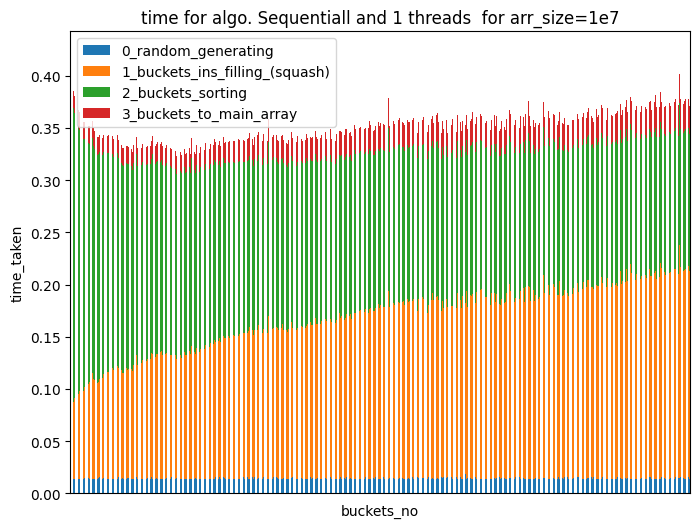

In [107]:
plot(seq_df, 0, add_t=' for arr_size=1e7')

## Both parallel

In [108]:
def stats_print(df, t, th=1, add_t=' for arr_size=1e7'):
    sns.scatterplot(data=df, x=t, y='total_time', hue='algo')
    plt.title(f"Total time for all algorithms and {th} threads")
    global gi
    plt.savefig(f"ims/{gi + 100}.png")
    plot(df, 0, t=t, th=1)
    plot(df, 2, t=t, th=th)
    plot(df, 3, t=t, th=th)

    plot_s(df, 2, t=t, th=th)
    plot_s(df, 3, t=t, th=th)

## total time vs arr_size

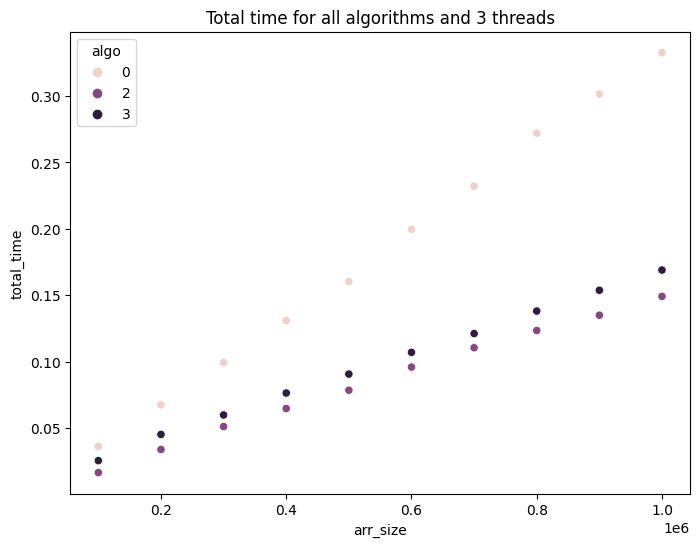

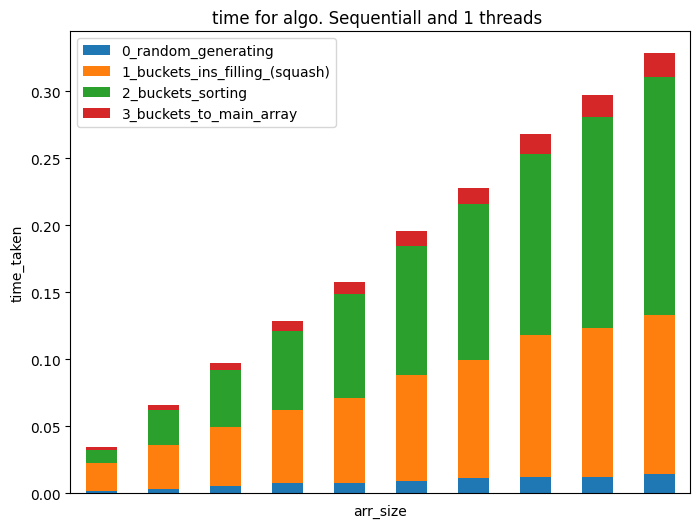

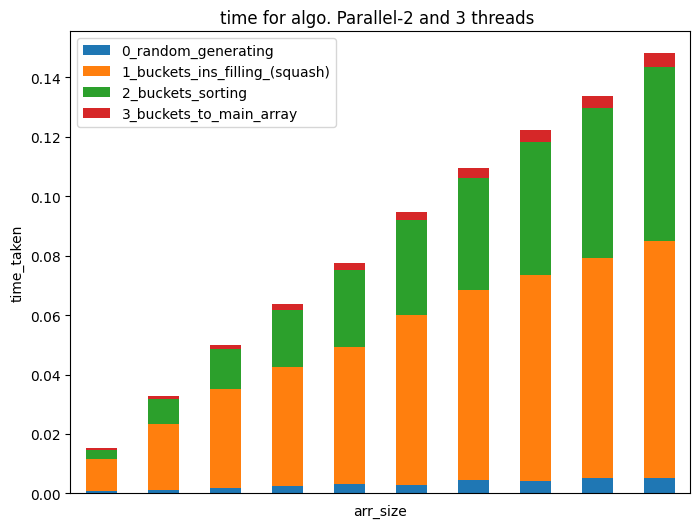

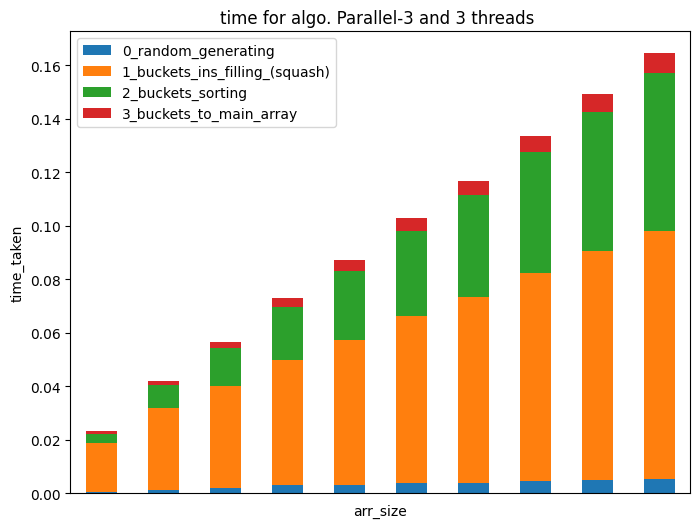

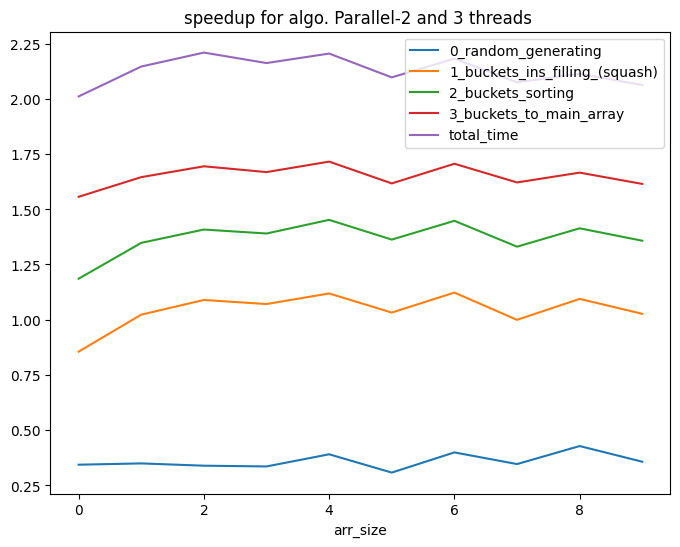

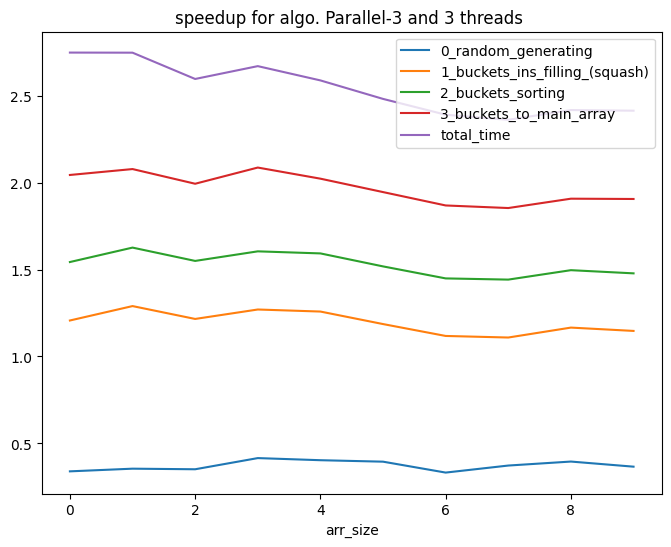

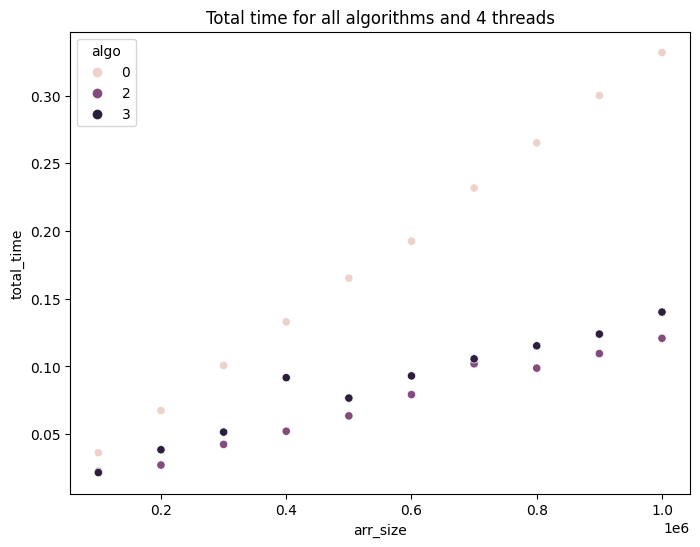

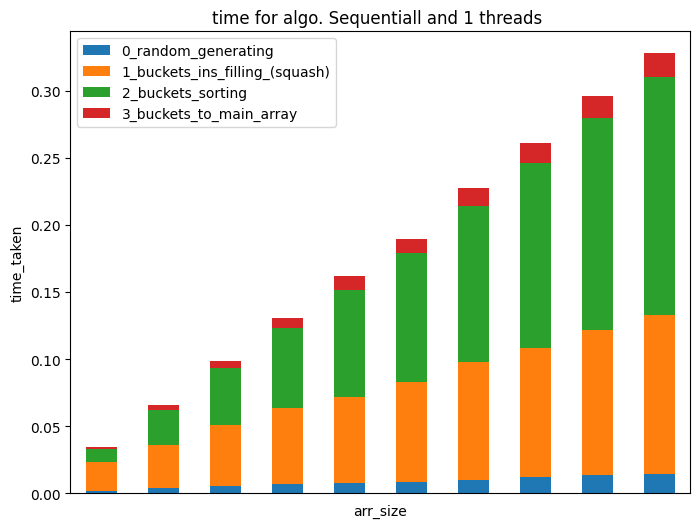

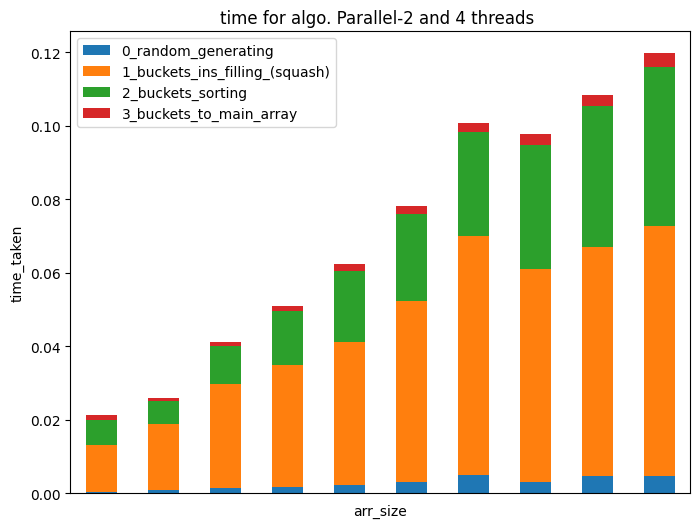

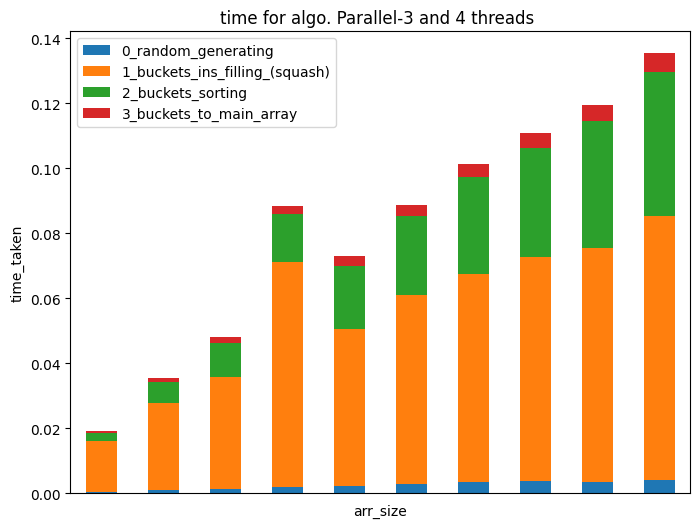

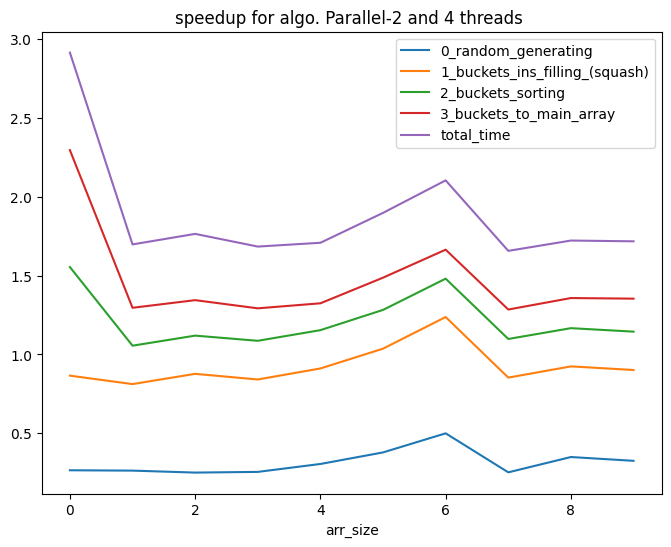

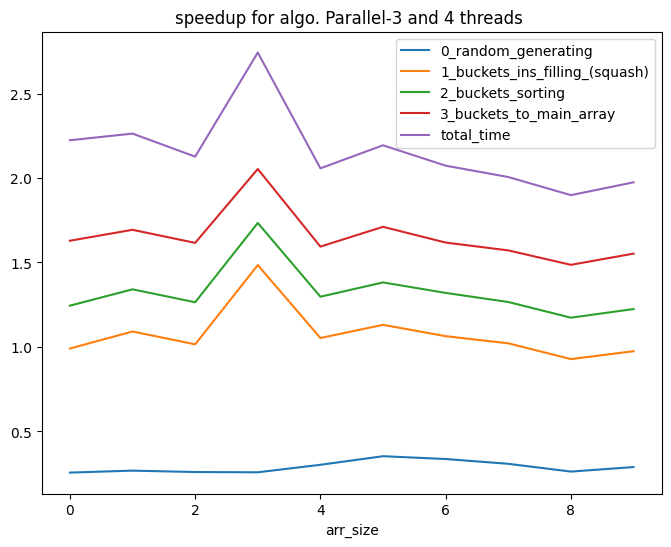

In [109]:
for i in range(3, 5):
    df = get_data(f'buckets{i}.txt', [0, 2, 3])
    stats_print(df, t='arr_size', th=i)
    plt.show()

## total time vs buckets_no

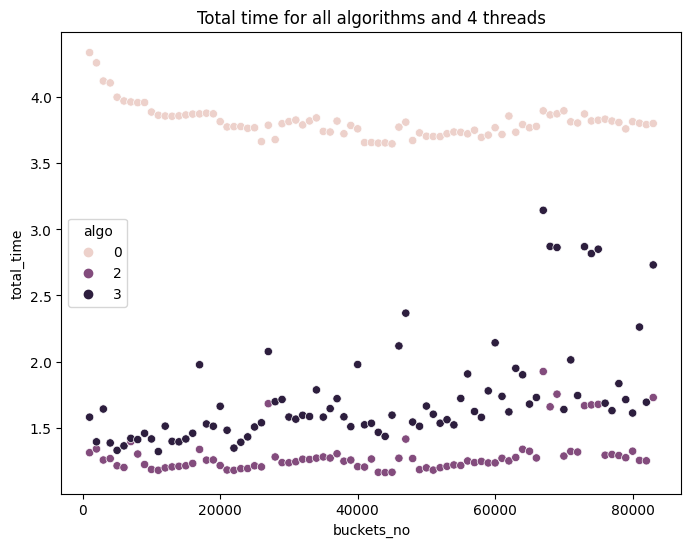

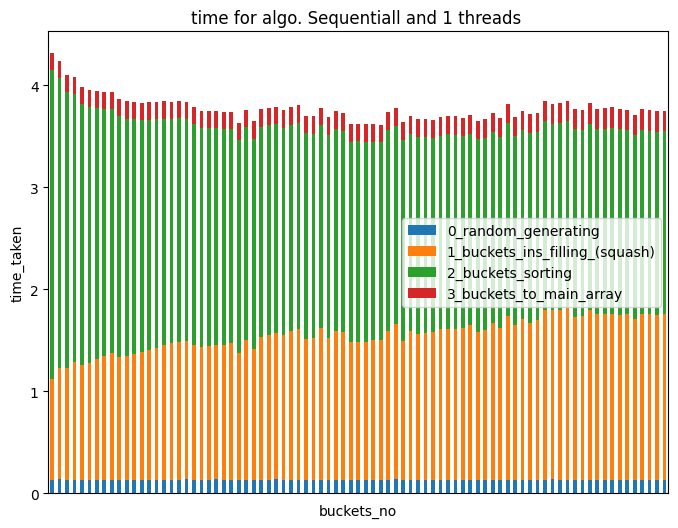

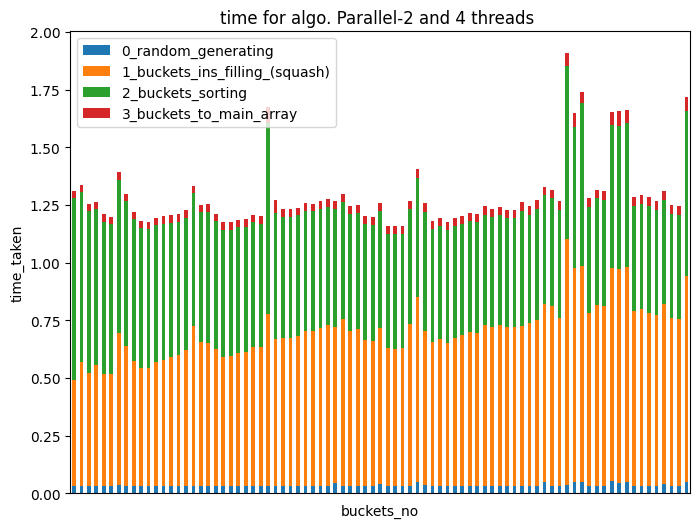

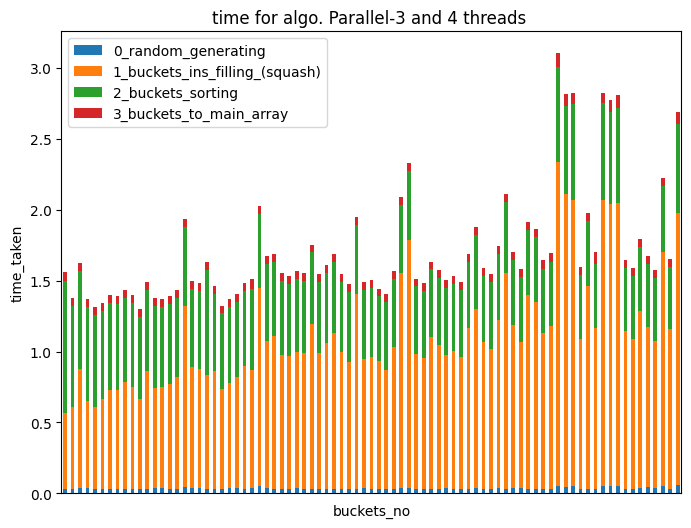

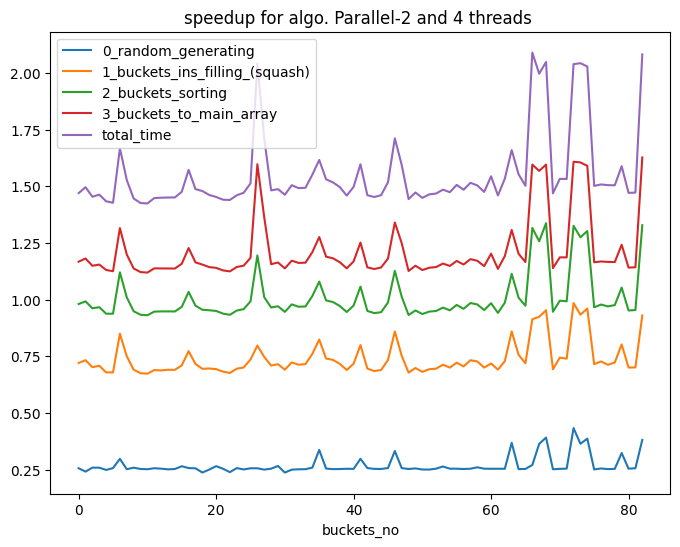

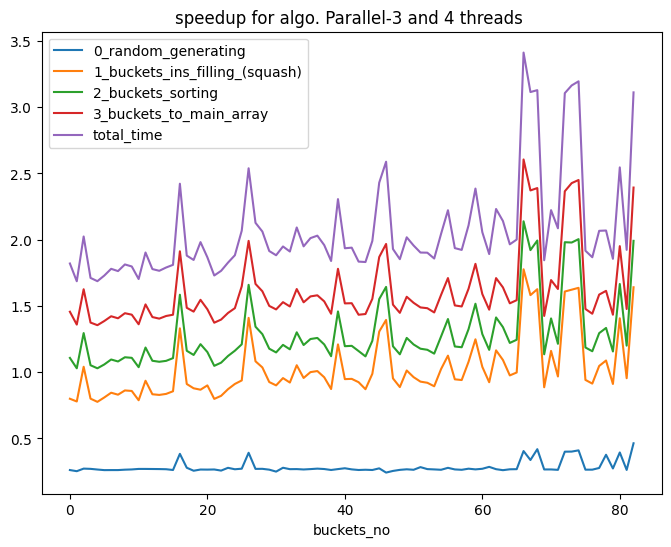

In [110]:
df = get_data(f'lab2-per-bucket.txt', [0, 2, 3])
stats_print(df, t = 'buckets_no', th=4)